# Nuages de mots

## Imports et stopwords

In [88]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\elaur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [89]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville","le soir","tÃ©l","trÃ¨s","trÃ¨s","app","leurs","terr","min","ecr",
       "ceux","fem"]
sw = set(sw)


## Créer un fichier contenant le texte de tous les journaux d'une année donnée

In [90]:
# Choisir une année
year = 1970

In [91]:
# Lister les fichiers de cette année
data_path = '../data'
txt_path = '../data/txt'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]
txts

['KB_JB838_1970-01-03_01-00002.txt',
 'KB_JB838_1970-01-06_01-00004.txt',
 'KB_JB838_1970-01-07_01-00020.txt',
 'KB_JB838_1970-01-09_01-00010.txt',
 'KB_JB838_1970-01-10_01-00029.txt',
 'KB_JB838_1970-01-18_01-00013.txt',
 'KB_JB838_1970-01-21_01-00011.txt',
 'KB_JB838_1970-01-22_01-00032.txt',
 'KB_JB838_1970-01-25_01-00014.txt',
 'KB_JB838_1970-02-04_01-00006.txt',
 'KB_JB838_1970-02-11_01-00015.txt',
 'KB_JB838_1970-02-13_01-00026.txt',
 'KB_JB838_1970-02-14_01-00006.txt',
 'KB_JB838_1970-02-14_01-00022.txt',
 'KB_JB838_1970-02-15_01-00016.txt',
 'KB_JB838_1970-02-19_01-00011.txt',
 'KB_JB838_1970-02-20_01-00007.txt',
 'KB_JB838_1970-02-26_01-00022.txt',
 'KB_JB838_1970-03-04_01-00015.txt',
 'KB_JB838_1970-03-10_01-00024.txt',
 'KB_JB838_1970-03-15_01-00011.txt',
 'KB_JB838_1970-03-19_01-00015.txt',
 'KB_JB838_1970-03-22_01-00002.txt',
 'KB_JB838_1970-03-22_01-00029.txt',
 'KB_JB838_1970-03-27_01-00018.txt',
 'KB_JB838_1970-03-28_01-00027.txt',
 'KB_JB838_1970-06-02_01-00032.txt',
 

In [92]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r',encoding="utf-8") as f:
        content_list.append(f.read())

In [93]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

100

In [94]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
# A partir de l'element zero
content_list[0][0:200]

"fC 2'! mam LE SOIR SAMEDI 3 JANVIER 1970 LA VIE POLITIQUE ET SOCIALE rapport de l'Association belge des Banques AU SECTEUR PUBLIC Une évolution sympathique : les Belges se familiarisent de plus en plu"

In [95]:
# Ecrire tout le contenu dans un fichier temporaire
# dans lequel qui contiendra tout le contenu de lannee
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w', encoding="utf-8") as f:
    f.write(' '.join(content_list))

In [96]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{year}.txt'), 'r', encoding="utf-8") as f:
    before = f.read()

before[:500]

"fC 2'! mam LE SOIR SAMEDI 3 JANVIER 1970 LA VIE POLITIQUE ET SOCIALE rapport de l'Association belge des Banques AU SECTEUR PUBLIC Une évolution sympathique : les Belges se familiarisent de plus en plus avec l'usage du chèque Parmi l'ensemble de. renseigne- meqts intéressants qui figurent dans lé nouveau rapport annuel de l’Association belge des Banques, il y a un graphique concernant la proportion; des creances des banques sur le secteur public par rapport au total de leurs créances sur le secte"

## Nettoyer le fichier à l'aide d'une fonction de nettoyage

### Créer la fonction de nettoyage (à adapter)

In [97]:
#garder tous les mots s'ils sont plus grands que 2 lettre et alphabetique

def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

### Appliquer la fonction sur le fichier complet de l'année

In [98]:
clean_text(year, folder=temp_path)

'Output has been written in ../data/tmp/1970_clean.txt!'

In [99]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r') as f:
    after = f.read()

after[:500]

'mam soir samedi janvier vie politique sociale rapport association belge banques secteur public Ã©volution sympathique belges familiarisent usage chÃ¨que parmi ensemble renseigne meqts intÃ©ressants figurent nouveau rapport annuel association belge banques graphique concernant proportion creances banques secteur public rapport total crÃ©ances secteur public privÃ© voici pourcentage prÃ©sentÃ© importance relative crÃ©ances banques secteur publie fin mars belgique pays bas italie allemagne france a'

## Nuage de mots

### Afficher les termes les plus fréquents


In [100]:
#afficher les mots les plus utilises
frequencies = Counter(after.split())
print(frequencies.most_common(10))

[('tÃ©l', 1560), ('bruxelles', 1181), ('rue', 1015), ('dem', 688), ('ans', 650), ('rossel', 627), ('trÃ¨s', 492), ('prix', 462), ('part', 441), ('heures', 411)]


### Créer, stocker et afficher le nuage de mots

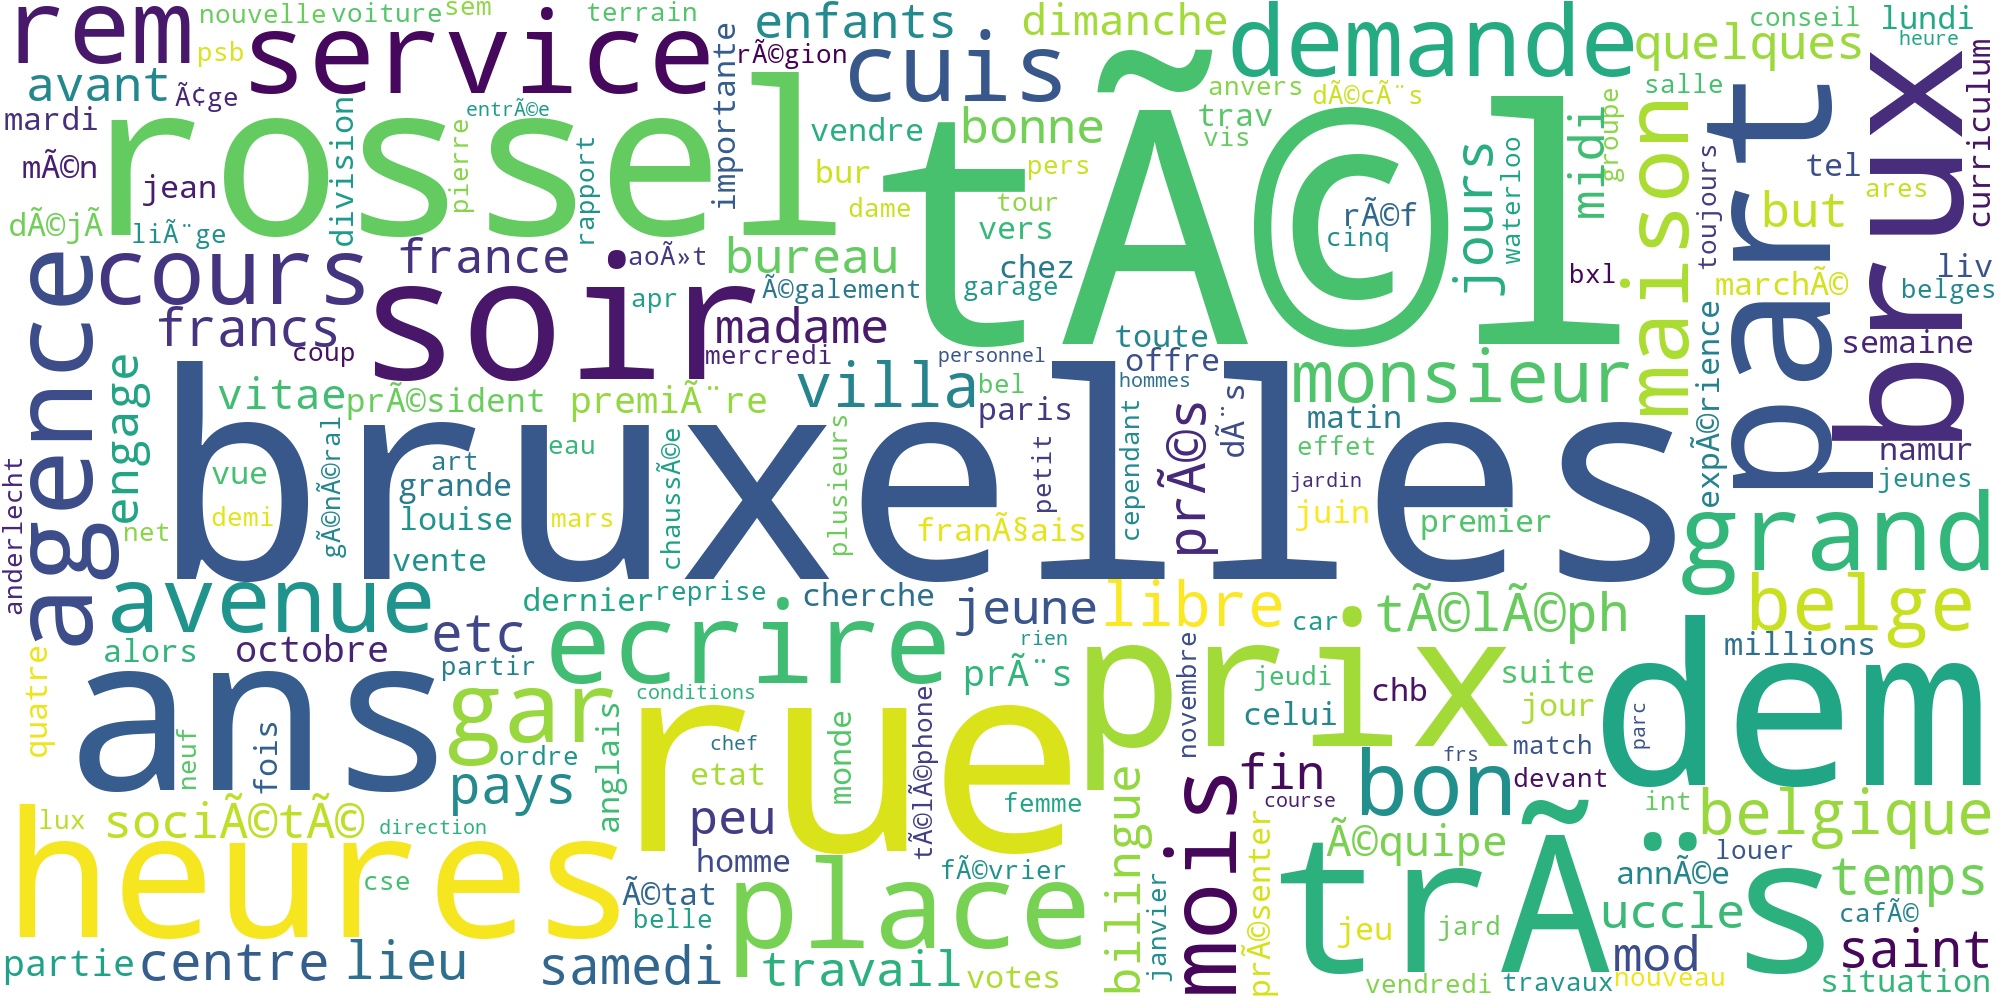

In [101]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))